In [33]:
import pandas as pd
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

FORMA DE LIMPIEZA EN PYTHON 

In [5]:
data = pd.read_csv("C:\\Users\\roriv\\OneDrive\\Desktop\\BARKENO\\barkeno_bbdd-csv.csv")

In [6]:
df = pd.read_csv("C:\\Users\\roriv\\OneDrive\\Desktop\\BARKENO\\barkeno_bbdd-csv.csv", sep=';')
columnas_deseadas = ['pax_reserva', 'pax_reserva_menor', 'pax_real', 'dia_reserva', 'id_visita', 'dia_visita', 'hora_visita', 'id_idioma_visita', 'id_origen_reserva', 'realitzat']
df = df[columnas_deseadas]
for columna in df.columns:
    df[columna] = df[columna].str.replace(r'[^0-9/]', '', regex=True)
df.to_csv('datos_limpio.csv', index=False, sep=';')

### SERIE DE TIEMPO 

In [7]:
df_limpio = pd.read_csv("C:\\Users\\roriv\\OneDrive\\Desktop\\BARKENO\\DF_PREPARADO.csv")

In [8]:
df_limpio

,pax_reserva,pax_reserva_menor,pax_real,dia_reserva,id_visita,dia_visita,hora_visita,id_idioma_visita,id_origen_reserva,realitzat,nombre_dia_reserva,nombre_dia_visita,diferencia_dias,categoria_temperatura,categoria_precipitacion,categoria_racha_viento
0,1,0,1,2021-04-30,Gótico,2021-12-27,0 days 10:00:00,Castellano,Civitatis,0,Friday,Monday,241,Templado,Sin Precipitación,Viento Muy Fuerte
1,1,0,1,2021-04-30,Modernismo,2021-12-30,0 days 16:00:00,Castellano,Civitatis,0,Friday,Thursday,244,Templado,Sin Precipitación,Viento Fuerte
2,2,0,2,2021-08-12,Gótico,2021-12-06,0 days 10:00:00,Castellano,Civitatis,1,Thursday,Monday,116,Templado,Sin Precipitación,Viento Fuerte
3,1,0,1,2021-08-12,Gótico,2022-01-20,0 days 10:30:00,Inglés,FreeTours,0,Thursday,Thursday,161,Frío,Sin Precipitación,Viento Fuerte
4,4,0,4,2021-08-20,Modernismo,2021-12-04,0 days 16:00:00,Castellano,Civitatis,1,Friday,Saturday,106,Templado,Sin Precipitación,Viento Muy Fuerte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59306,4,2,2,2023-08-29,Modernismo,2023-08-29,0 days 10:30:00,Castellano,FreeTours,1,Tuesday,Tuesday,0,Cálido,Muy Fuerte Precipitación,Viento Muy Fuerte
59307,2,0,2,2023-08-29,Modernismo,2023-08-29,0 days 16:00:00,Castellano,Barkeno Tours,0,Tuesday,Tuesday,0,Cálido,Muy Fuerte Precipitación,Viento Muy Fuerte
59308,3,0,3,2023-08-29,Modernismo,2023-08-29,0 days 10:30:00,Castellano,GuruWalk,0,Tuesday,Tuesday,0,Cálido,Muy Fuerte Precipitación,Viento Muy Fuerte
59309,1,0,1,2023-08-29,Gótico,2023-08-29,0 days 16:30:00,Inglés,FreeTours,0,Tuesday,Tuesday,0,Cálido,Muy Fuerte Precipitación,Viento Muy Fuerte


In [9]:
df_realitzat_1 = df_limpio[df_limpio['realitzat'] == 1]
df_realitzat_0 = df_limpio[df_limpio['realitzat'] == 0]

In [23]:
# Para df_realitzat_1:
df_realitzat_1_grouped = df_realitzat_1[['pax_real', 'dia_visita']].groupby('dia_visita').sum().reset_index()

# Para df_realitzat_0:
df_realitzat_0_grouped = df_realitzat_0[['pax_real', 'dia_visita']].groupby('dia_visita').sum().reset_index()


12:05:22 - cmdstanpy - INFO - Chain [1] start processing
12:05:22 - cmdstanpy - INFO - Chain [1] done processing


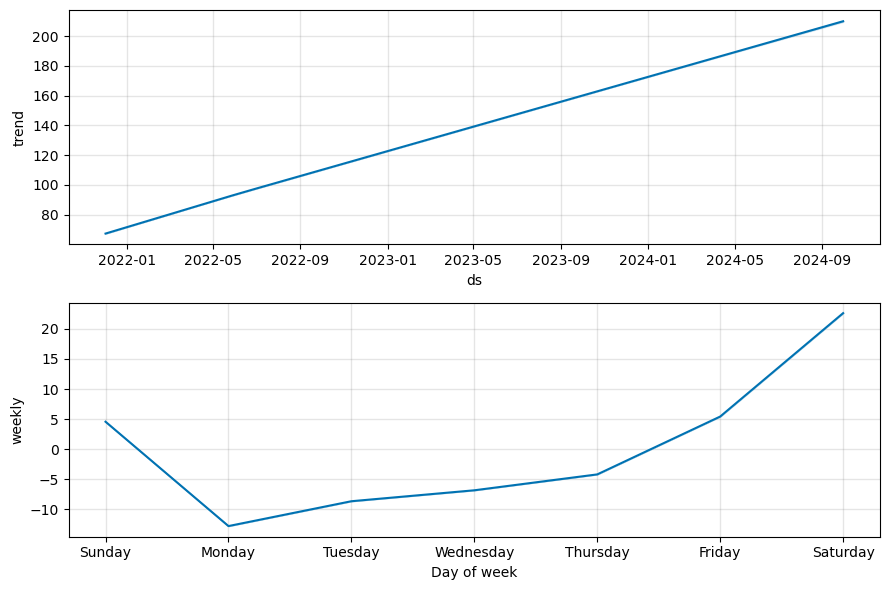

In [106]:
df0 = df_realitzat_0_grouped.reset_index()
df0.rename(columns = {'dia_visita':'ds', 'pax_real':'y'}, inplace = True)
df0['ds'] = pd.to_datetime(df0['ds'])
df0 = df_realitzat_0_grouped.reset_index()
df0.rename(columns={'dia_visita': 'ds', 'pax_real': 'y'}, inplace=True)
m = Prophet()
m.fit(df0)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig0 = m.plot_components(forecast)


12:05:26 - cmdstanpy - INFO - Chain [1] start processing
12:05:26 - cmdstanpy - INFO - Chain [1] done processing


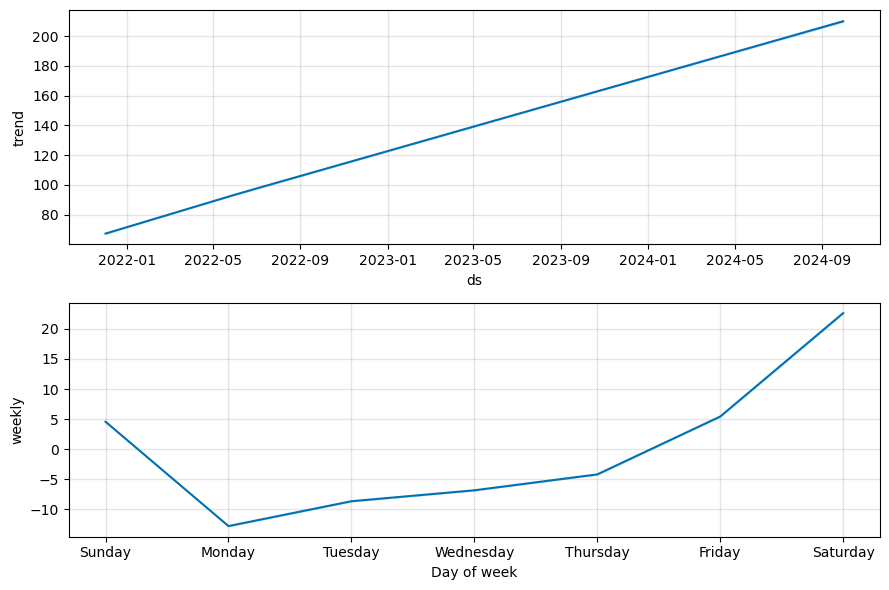

In [107]:
df1 = df_realitzat_1_grouped.reset_index()
df1.rename(columns = {'dia_visita':'ds', 'pax_real':'y'}, inplace = True)
df1['ds'] = pd.to_datetime(df1['ds'])
df1 = df_realitzat_1_grouped.reset_index()
df1.rename(columns={'dia_visita': 'ds', 'pax_real': 'y'}, inplace=True)
m1 = Prophet()
m1.fit(df1)
future1 = m.make_future_dataframe(periods=365)
forecast1 = m.predict(future1)
fig1 = m.plot_components(forecast1)


AGRUPACIÓN DIARIA

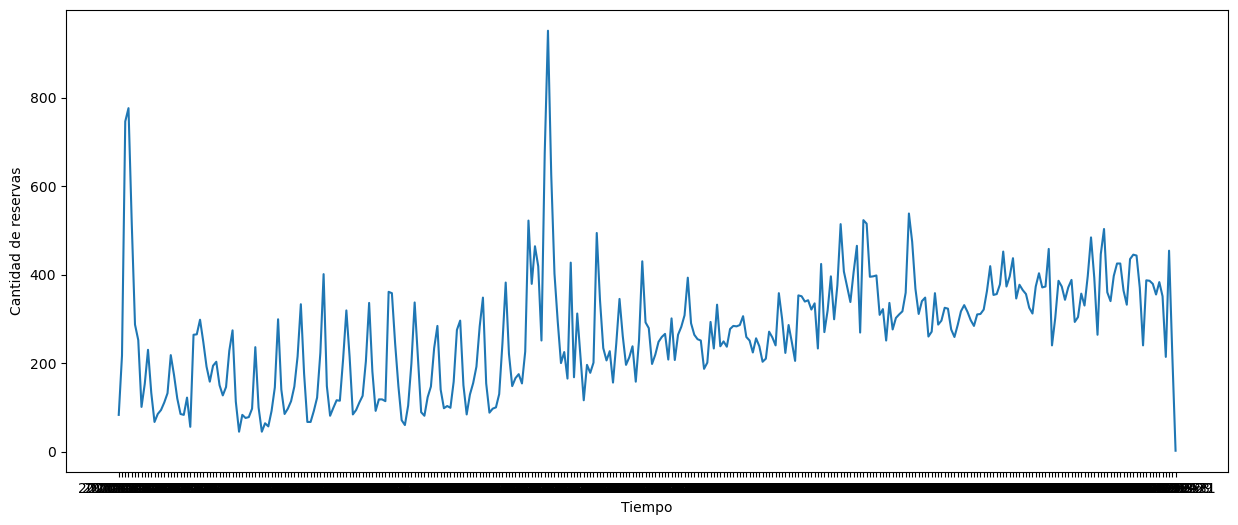

In [12]:
plt.figure(figsize = (15,6))
plt.plot(df_realitzat_1_grouped.dia_visita, df_realitzat_1_grouped.pax_real)
plt.xlabel('Tiempo')
plt.ylabel("Cantidad de reservas")
plt.show()

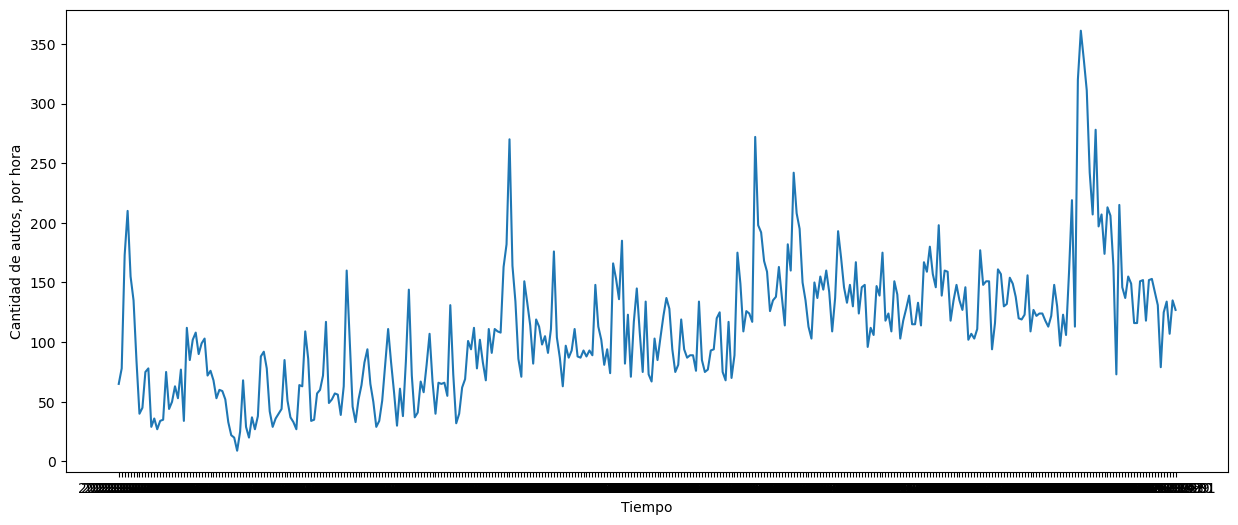

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(df_realitzat_0_grouped.dia_visita, df_realitzat_0_grouped.pax_real)
plt.xlabel('Tiempo')
plt.ylabel("Cantidad de reservas")
plt.show()